# Data Analysis on Coronavirus Outbreak

## __Wuhan Coronavirus__

### What is coronavirus?

The coronavirus is a family of viruses that can cause a range of illnesses in humans including common cold and more severe forms like SARS and MERS which are life-threatening. The virus is named after its shape which takes the form of a crown with protrusions around it and hence is known as coronavirus.

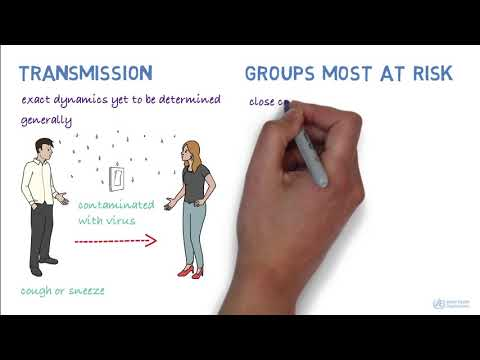

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('mOV1aBVYKGA', width=600, height=400)

### How did the recent outbreak occur?
The recent outbreak of coronavirus is believed to have occurred in a market for illegal wildlife in the central Chinese city of Wuhan. Chinese health authorities and the WHO are investigating the outbreak of the recent coronavirus which has claimed thousands of lives.

### Data Exploration

In [10]:
# import the necessary libraries
import numpy as np 
import pandas as pd 

# Visualisation libraries
import matplotlib.pyplot as plt
from pprint import pprint
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

'''Plotly visualization .'''
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
py.init_notebook_mode(connected = True) # Required to use plotly offline in jupyter notebook

In [11]:
df = pd.read_csv("corona_geral.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 6 columns):
Province/State    52 non-null object
Country/Region    73 non-null object
Last Update       73 non-null object
Confirmed         73 non-null int64
Deaths            73 non-null int64
Recovered         73 non-null int64
dtypes: int64(3), object(3)
memory usage: 3.5+ KB


### GLOBALY

In [12]:
df.rename({'Country/Region': 'Country'}, axis='columns', inplace=True)
df['Country'].replace({'Mainland China':'China'},inplace=True)

countries = pd.DataFrame(df.groupby('Country')['Country','Confirmed','Deaths', 'Recovered'].sum())
countries

,Confirmed,Deaths,Recovered
Country,,,
Australia,15,0,2
Belgium,1,0,0
Cambodia,1,0,1
Canada,7,0,0
China,44687,1115,5062
Finland,1,0,1
France,11,0,0
Germany,16,0,0
Hong Kong,50,1,1


In [13]:
coordinates = pd.read_csv('coordinates.csv')

countries['Country'] = countries.index
countries.index=np.arange(1,len(countries)+1)
countries = pd.merge(coordinates,countries,on='Country')

In [14]:

fig = go.Figure()
fig.add_trace(go.Scattergeo(
        lat=countries['latitude'],
        lon=countries['longitude'],
        mode="markers",
        marker=dict(
            size=17,
            color='rgb(255, 0, 0)',
            opacity=0.7
        ),
        text=countries['Country'],
        hoverinfo="text",
    ))

fig.add_trace(go.Scattergeo(
        lat=countries['latitude'],
        lon=countries['longitude'],
        mode='markers',
        marker=dict(
            size=8,
            color='rgb(242, 177, 172)',
            opacity=0.7
        ),
        hoverinfo='none'
    ))

fig.update_layout(
        autosize=True,
        hovermode='closest',
        showlegend=False,
        title_text = '<b>Countries with Confirmed, Deaths and Recovered cases of 2019-nCoV',
        font=dict(family="Courier New", color='darkred'),
    geo = go.layout.Geo(
        showframe = False,
        showcoastlines = False,
        showcountries = True,
        landcolor = "rgb(229, 229, 229)",
        countrycolor = "black",
        coastlinecolor = "black",
        projection_type="natural earth"
    ))

 
fig.show()

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



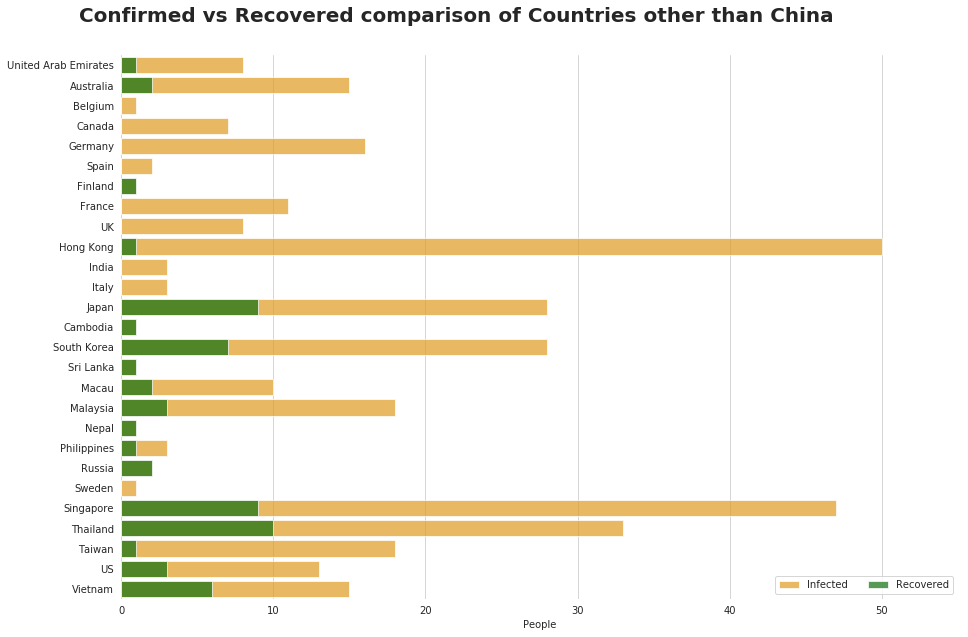

In [15]:
others = countries[countries.Country != 'China']
others = others[countries.Country != 'Others']

f, ax = plt.subplots(figsize=(15, 10))


sns.barplot(x="Confirmed", y="Country", data=others,
            label="Infected", color="orange",alpha=0.7)


sns.barplot(x="Recovered", y="Country", data=others,
            label="Recovered", color="g",alpha=0.7)


ax.set_title('Confirmed vs Recovered comparison of Countries other than China', fontsize=20, fontweight='bold', position=(0.40, 1.05))
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 55), ylabel="",
       xlabel="People")
sns.despine(left=True, bottom=True)

In [8]:
print("\nOverall, there are",df['Confirmed'].sum(),"people affected,", 
      df['Recovered'].sum(),"recovered and", 
      df['Deaths'].sum(),"deaths.")


Overall, there are 45206 people affected, 5123 recovered and 1117 deaths.


### CHINA SCENARIO